In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [80]:
df = pd.read_csv("../dataset/customer_churn_records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [81]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [83]:
# Check for null values

df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [84]:
df.duplicated().sum()

np.int64(0)

In [85]:
# Set the style of the visualization
sns.set(style="whitegrid")

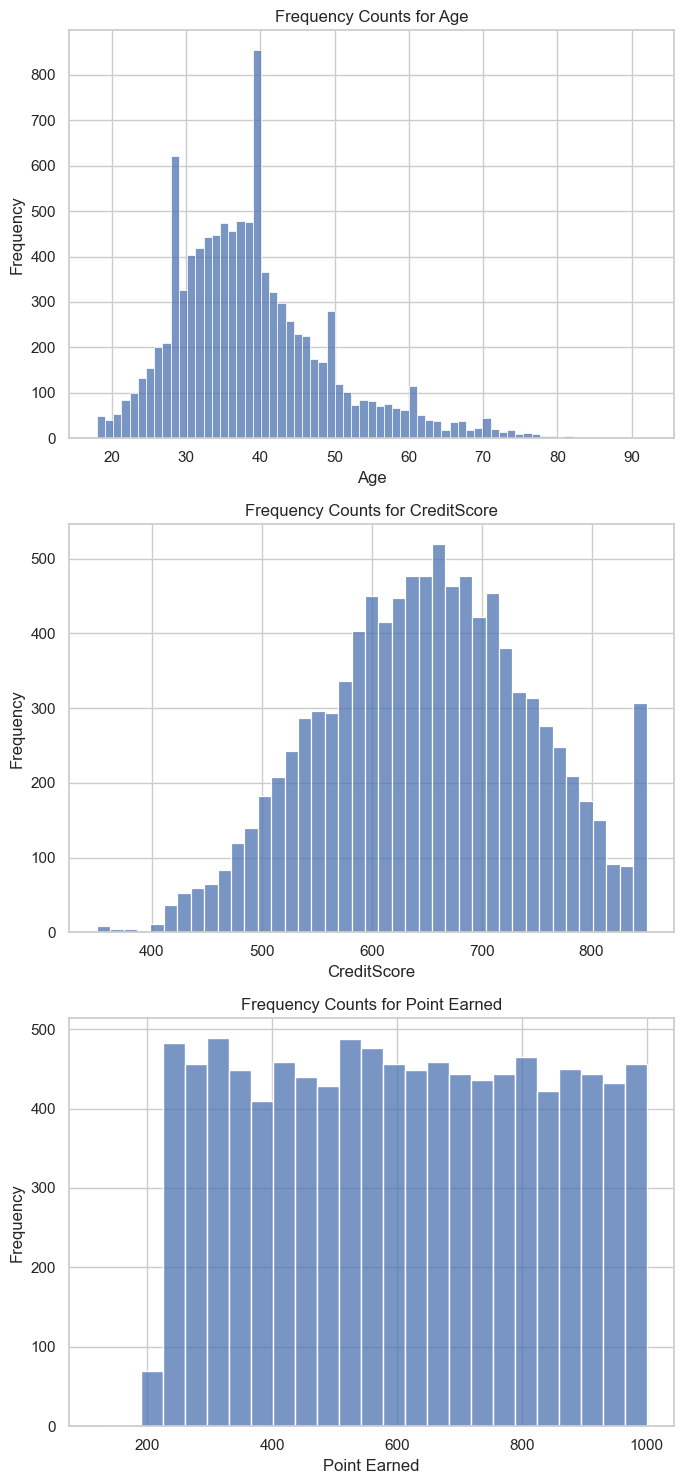

In [86]:
def visualize_numerical_frequency_counts(df):
    # Select only specified numerical columns
    numerical_columns = ["Age", "CreditScore", "Point Earned"]
    
    # Number of plots
    num_plots = len(numerical_columns)
    
    # Set the style of the visualization
    sns.set(style="whitegrid")
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_plots, 1, figsize=(7, num_plots * 5))
    
    if num_plots == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=False, ax=axes[i])
        axes[i].set_title(f'Frequency Counts for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
visualize_numerical_frequency_counts(df)


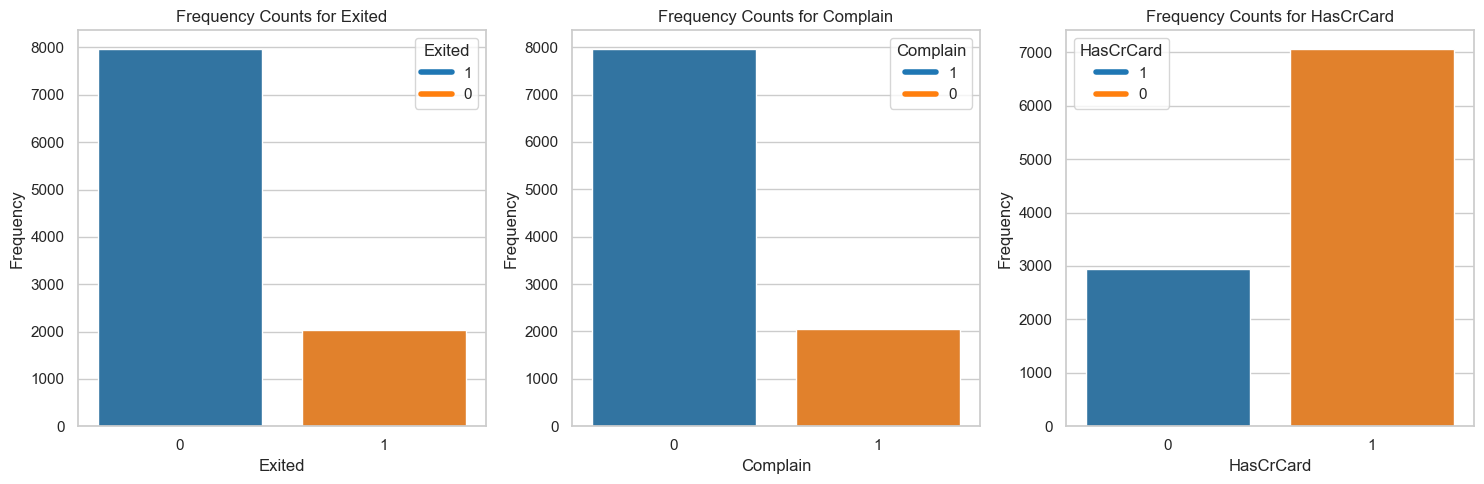

In [87]:
categorical_columns = ['Exited', 'Complain', "HasCrCard"]

# Custom colors for each bar (you can customize this list as needed)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


# Create a figure with subplots side by side
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], hue=df[col], palette=colors[:df[col].nunique()], ax=axes[i], legend=False)
    axes[i].set_title(f'Frequency Counts for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x')

    # Custom legend for the plot
    labels = df[col].unique()
    custom_lines = [plt.Line2D([0], [0], color=colors[j], lw=4) for j in range(len(labels))]
    axes[i].legend(custom_lines, labels, title=col)

# Adjust layout
plt.tight_layout()
plt.show()



From the graphs above, it's evident that:
- a few number of customers eventually exited the bank
- a lot of customers logdged complaints
- a good number of customers have credit cards
Let's view the corretion between these variables

Correlation Matrix:
                        Exited    Complain  EstimatedSalary         Age  \
Exited              100.000000   99.569250         1.248972   28.529646   
Complain             99.569250  100.000000         1.249395   28.352989   
EstimatedSalary       1.248972    1.249395       100.000000   -0.720104   
Age                  28.529646   28.352989        -0.720104  100.000000   
CreditScore          -2.677145   -2.704797        -0.138429   -0.396491   
Balance              11.857690   11.912426         1.279750    2.830837   
HasCrCard            -0.697607   -0.709521        -0.993341   -1.172103   
Satisfaction Score   -0.584920   -0.479908        -1.374663   -0.087637   

                    CreditScore     Balance   HasCrCard  Satisfaction Score  
Exited                -2.677145   11.857690   -0.697607           -0.584920  
Complain              -2.704797   11.912426   -0.709521           -0.479908  
EstimatedSalary       -0.138429    1.279750   -0.993341           -1.3

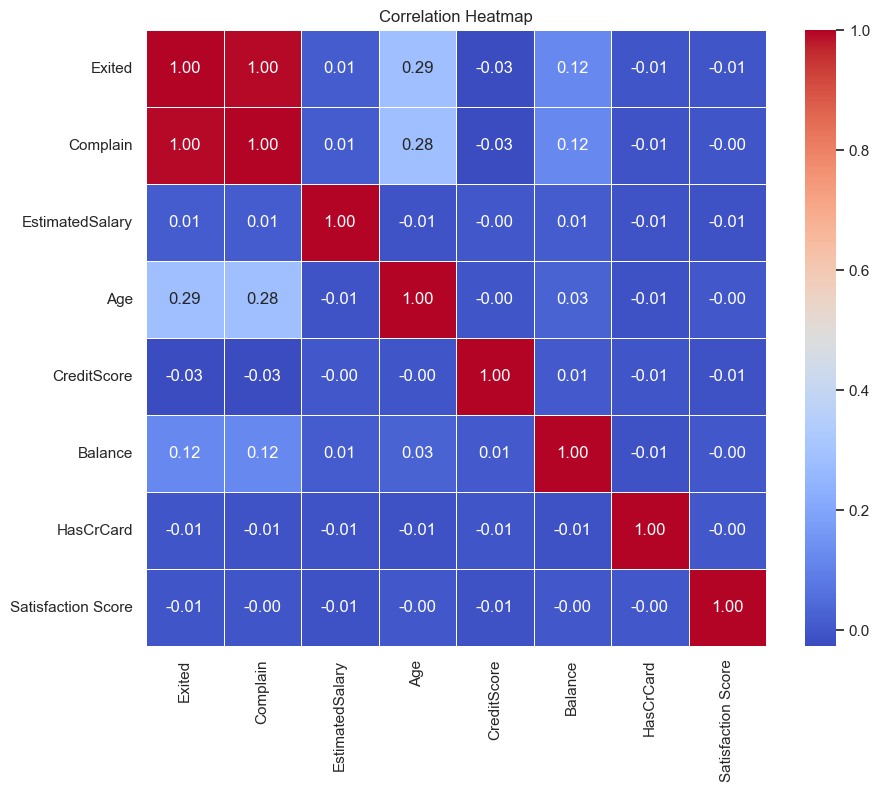

In [88]:
numerical_columns = ["Exited", "Complain", "EstimatedSalary", "Age", "CreditScore", "Balance", "HasCrCard", "Satisfaction Score"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix * 100)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure for the heatmap
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

# Set title and labels
plt.title('Correlation Heatmap')
plt.show()


From the heatmap above, we can see that rate of exit of customers and complaints are heavily correlated, with a relation of 99.5%.
Age also has a role to play in rate of exit cause the correlation between exit and age is appoximately 29%.
